# Task

- The task at hand is to predict whether a client has a good or bad credit profile for a loan application.
- We have a set of details of past loan applicants including their age, job details, credit amount, duration, etc. and whether the applicant turned out to be a defaulter or not.
- We will use these details to build a machine learning model that, given a profile of a new applicant, will predict with some confidence whether he/she will turn out be a defaulter.

# About Data

- The data represents credit history of various customers. It is needed to decide whether a customer is a good or a bad fit for a new loan application. Each attribute has its own importance in deciding whether a customer is good or a bad credit risk.

* The attributes(features) are as follows :

 * checkin_acc: (qualitative) 
   Status of existing checking account 

 * duration: (numerical) 
   Duration in month 

 * credit_history: (qualitative) 
   Credit history

 * purpose: (qualitative) 
   Purpose of loan

 * amount: (numerical) 
   Credit amount 

 * saving_acc: (qualitative) 
   Savings account/bonds 

 * present_emp_since: (qualitative) 
   Present employment since 

 * inst_rate: (numerical) 
   Installment rate in percentage of disposable income 

 * personal_status: (qualitative) 
   Personal status and sex 

 * other_debtors: (qualitative) 
   Other debtors / guarantors 

 * residing_since: (numerical) 
   Present residence since 

 * property: (qualitative) 
   Property 

 * age: (numerical) 
   Age in years 

 * inst_plans: (qualitative) 
   Other installment plans 

 * housing: (qualitative) 
   Housing 

 * num_credits: (numerical) 
   Number of existing credits at this bank 

 * job: (qualitative) 
   Job 

 * dependents: (numerical) 
   Number of people being liable to provide maintenance for 

 * telephone: (qualitative) 
   Telephone 

 * foreign_worker: (qualitative) 
   foreign worker 
   
* The target variable is binary classification: 
    * 1 - Good Credit
    * 0 - Bad Credit

# Evaluation Metric

- The model will be evaluated on how well it predicts the credit risk on a new customer's loan application.
- It would be tolerable if the model marks some of the good profiles as 'bad', but marking bad profiles as 'good' is not desired.

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression, De
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [8]:
def load_data(path):
    
    data = pd.read_csv(path, delim_whitespace = True, header = None )
    
    columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
         'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
         'other_debtors', 'residing_since', 'property', 'age',
         'inst_plans', 'housing', 'num_credits',
         'job', 'dependents', 'telephone', 'foreign_worker', 'status']
                  
    
    data.columns = columns

    return data

In [9]:
path = '../data/german.txt'

In [10]:
df = load_data(path)
df.loc[df.status == 2, 'status'] = 0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
purpose              1000 non-null object
amount               1000 non-null int64
saving_acc           1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
other_debtors        1000 non-null object
residing_since       1000 non-null int64
property             1000 non-null object
age                  1000 non-null int64
inst_plans           1000 non-null object
housing              1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
dependents           1000 non-null int64
telephone            1000 non-null object
foreign_worker       1000 non-null object
status               1000 non-null int64
dtypes: int64(8), ob

In [12]:
df.status.value_counts()

1    700
0    300
Name: status, dtype: int64

In [13]:
df.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


# Dataset Sampling 

In [14]:
def distribution_plot_numerical(X, num_cols):

    plt.figure(figsize=(20,5))
    for i in range(0, len(num_cols)):

        plt.subplot(1,2, i+1)
        sns.distplot(X[num_cols[i]], hist=True)

In [15]:
num_cols = df._get_numeric_data().columns.values
cat_cols = list(set(df.columns) - set(num_cols))
num_cols

array(['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits', 'dependents', 'status'], dtype=object)

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


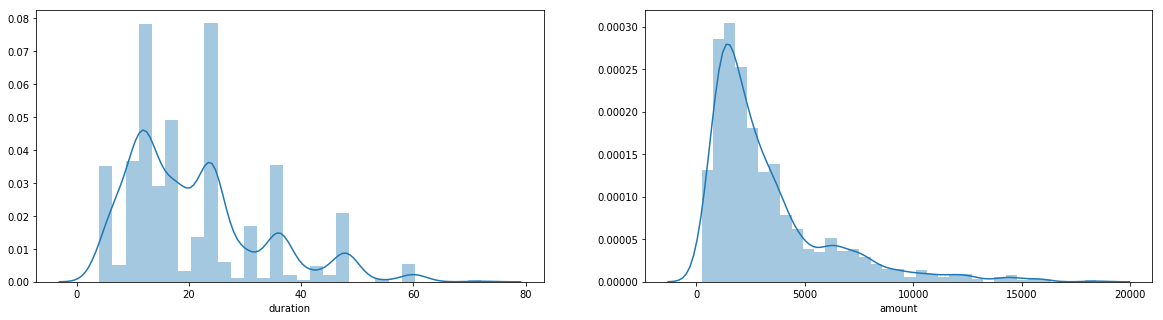

In [16]:
distribution_plot_numerical(df, ['duration', 'amount'])

- The feature `duration` follows a `multi-modal` distribution i.e you can see multiple peaks. These peaks signify that, the duration of loans are mostly between 10-15 months, 22-25 months, 35-38 months etc.

- The feature `amount` is centered around mean 3270 DM, but there are few amounts which are further away(outlying) and needs inspection.

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


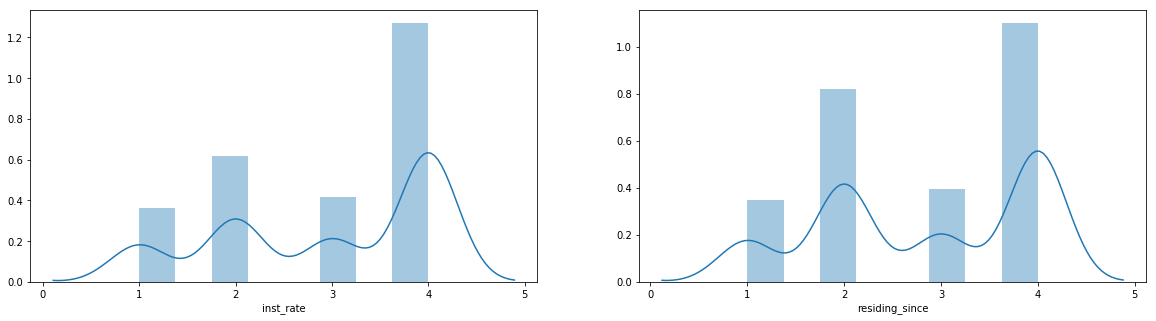

In [22]:
distribution_plot_numerical(df, ['inst_rate', 'residing_since'])

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


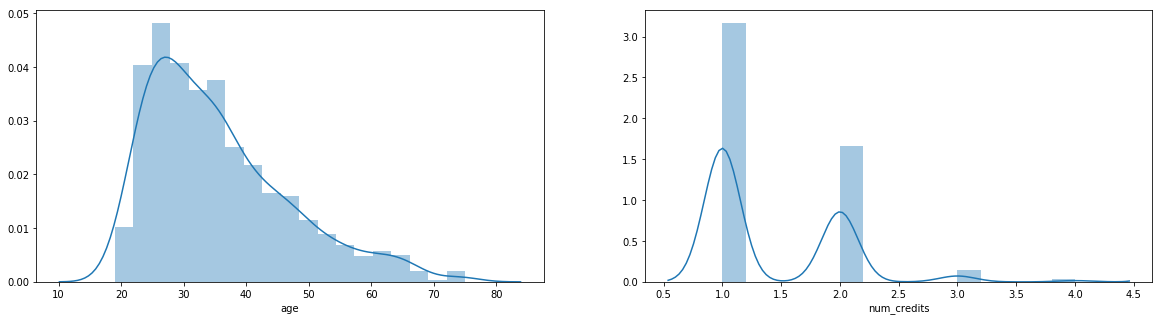

In [31]:
distribution_plot_numerical(df, ['age', 'num_credits'])

- The average age is 35, which denotes most of our data comes from working class and there are few data points which belong to higher age group, which requires further inspection. 

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


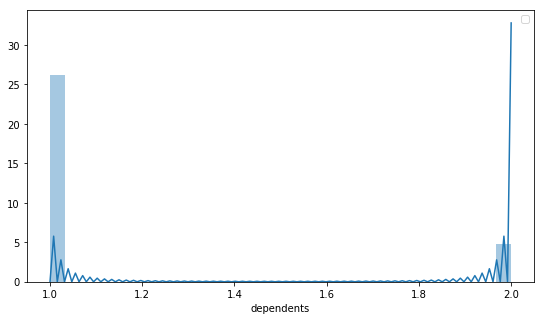

In [20]:
distribution_plot_numerical(df, ['dependents'])

In [40]:
def distribution_category(X, col):
    
    plt.figure(figsize=(15,10))
    for i in range(0, len(col)):
        plt.subplot(7,2,i+1)
        g = sns.countplot(col[i], data = X, dodge=False)
        plt.tight_layout()
#         for p in g.patches:
#             g.annotate(p.get_height(), (p.get_x()+(p.get_width()/3), p.get_height() + 10))

    #     cmap = plt.cm.cmap
    #     custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
    #                 Line2D([0], [0], color=cmap(.5), lw=4),
    #                 Line2D([0], [0], color=cmap(1.), lw=4),
    #                 Line2D([0], [0], color=cmap(1.), lw=4)]

    #     g.legend(custom_lines, labels)
    plt.show()

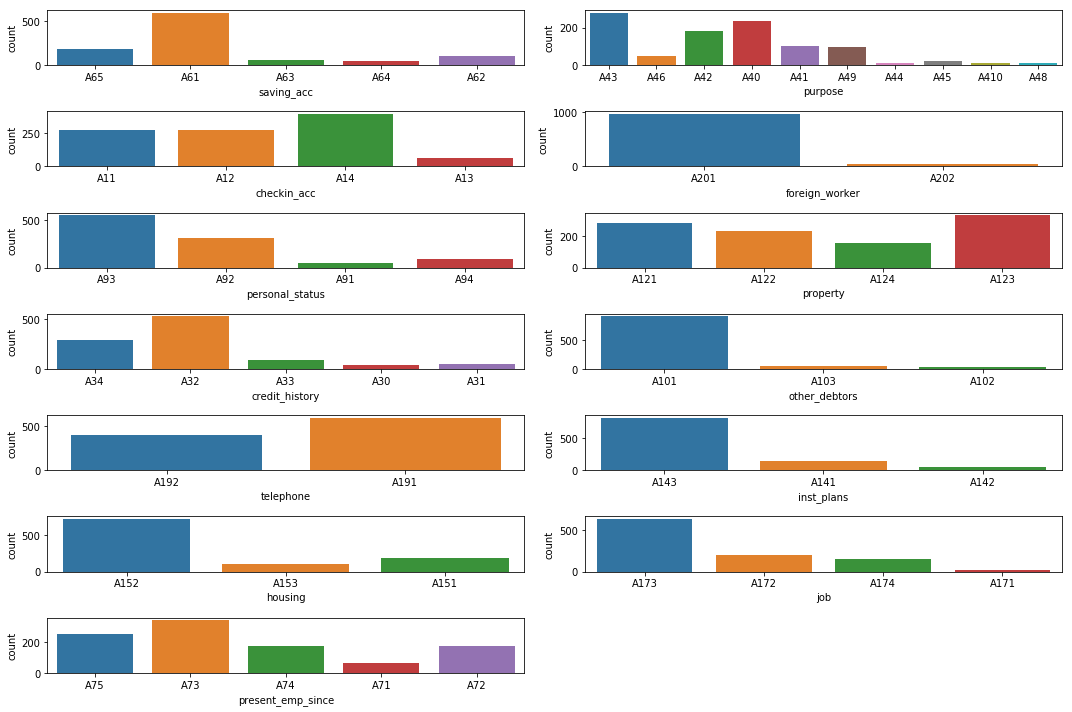

In [41]:
labels = ['Balance = 0 DM', '0 <= Balance < 200 DM', 'Balance >= 200 DM / salary assignments for at least 1 year ', 'no checking account']
distribution_category(df, cat_cols)

### Target Distribution

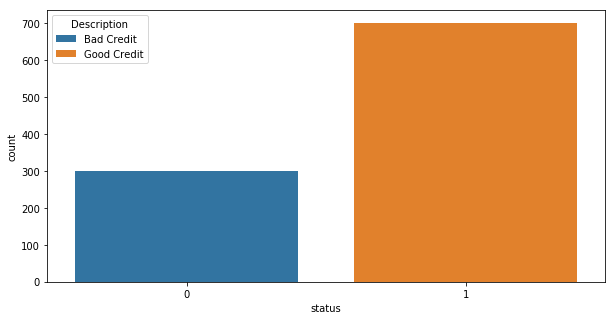

In [163]:
labels = ['Bad Credit', 'Good Credit']
distribution_category(df, 'status', labels)

# Splitting Data  (Train - Validation - Test )

In [165]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5 , random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X, y,test_size=0.5 , random_state=42)

In [167]:
X_train.shape,X_val.shape,X_test.shape

((500, 20), (500, 20), (500, 20))

In [168]:
num_cols = X_train._get_numeric_data().columns.values
cat_cols = list(set(X_train.columns) - set(num_cols))

## Check whether train and test distribution are the same

In [23]:
def qq_calculate(X_train, X_test):
     
    train = []
    test = []
    for quantile in np.arange(0.1,1.1,0.1):
        train.append(X_train.quantile(quantile))
        test.append(X_test.quantile(quantile))   
    train_quantile = pd.concat(train, axis=1)
    test_quantile = pd.concat(test, axis=1)
    train_quantile.columns = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
    test_quantile.columns = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
    return train_quantile, test_quantile

In [24]:
def qq_plot(train_quantile, test_quantile):
    
    features = train_quantile.index.values
    plt.figure(figsize=(13,15))
    for i in range(0, len(features)):
        plt.subplot(5,2,i+1)
        plt.plot(train_quantile.loc[features[i]], test_quantile.loc[features[i]])
        plt.plot(train_quantile.loc[features[i]], train_quantile.loc[features[i]])
        plt.xlabel('Train_' + features[i])
        plt.ylabel('Test_' + features[i])
        plt.tight_layout()

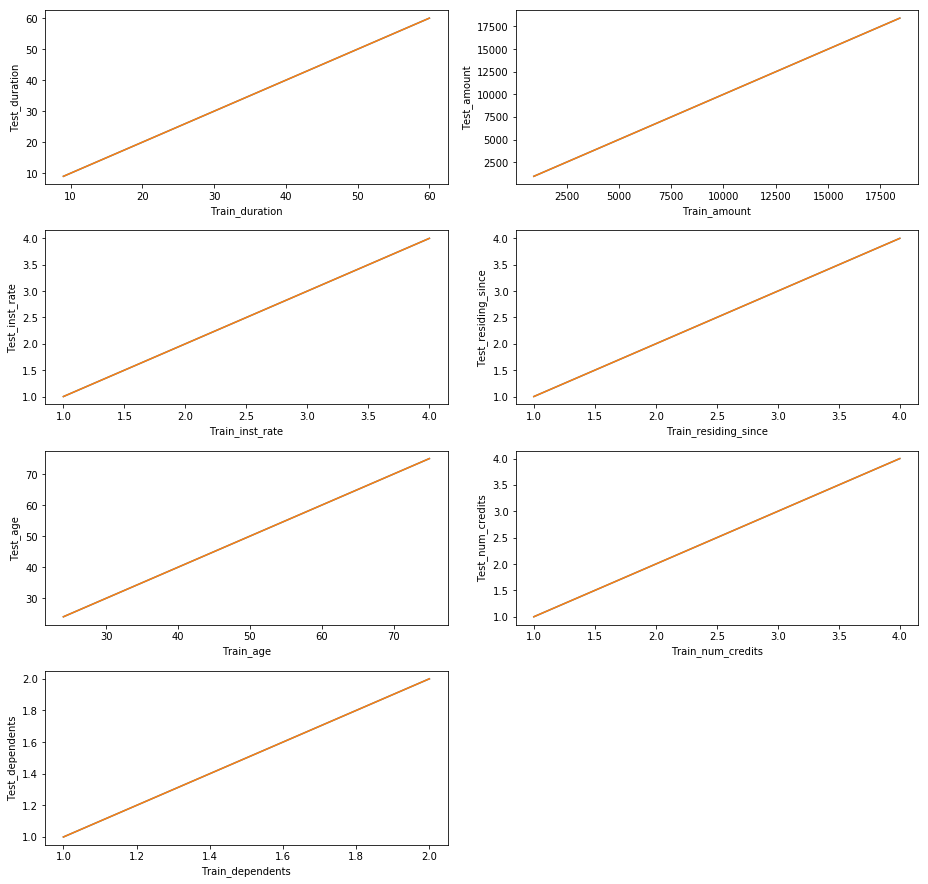

In [25]:
train_quantile, test_quantile = qq_calculate(X_train, X_val)
qq_plot(train_quantile, test_quantile)

- The above q-q plot shows that the train-test data come from a population with common distribution

# EDA - Univariate

## 1) Q-Q plot

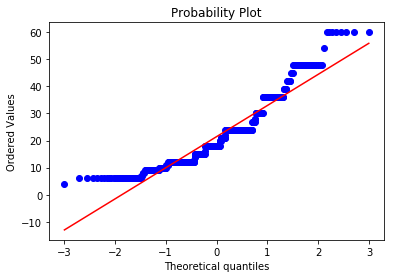

In [32]:
stats.probplot(X_train['duration'], dist="norm", fit=True, plot=pylab)
pylab.show()

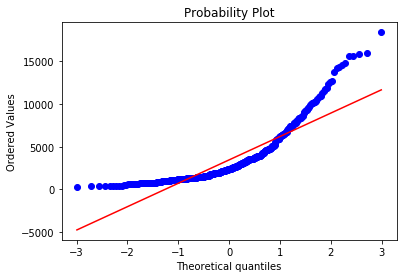

In [50]:
stats.probplot(X_train['amount'], dist="norm", plot=pylab)
pylab.show()

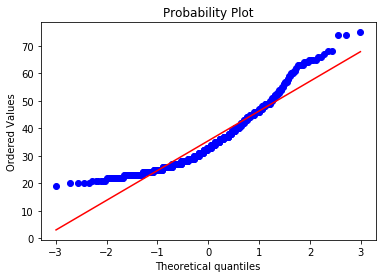

In [51]:
stats.probplot(X_train['age'], dist="norm", plot=pylab)
pylab.show()

## 2) Box- whisker plot

In [28]:
def box_plot(X, num_cols):
    plt.figure(figsize=(13,15))
    for i in range(0, len(num_cols)):

            plt.subplot(4,2,i+1)
            sns.boxplot(y=num_cols[i],data = X)

    plt.tight_layout()
    plt.show()

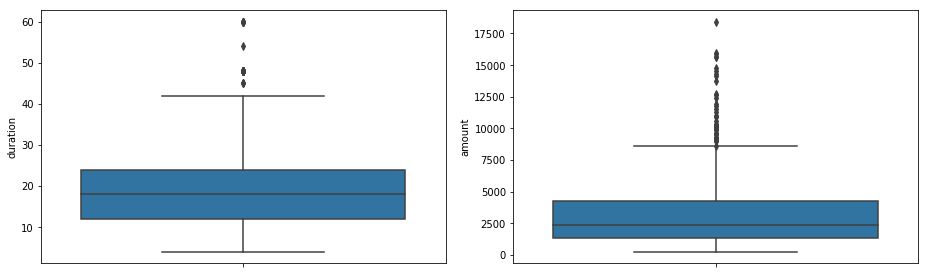

In [29]:
box_plot(X_train, ['duration', 'amount'])

#### Duration extreme values

In [45]:
iqr = X_train['duration'].quantile(0.75) - X_train['duration'].quantile(0.25)
whisker = X_train['duration'].quantile(0.75) + 1.5 * iqr
outlying_values_frequency = X_train[X_train['duration'] > whisker]['duration'].value_counts()
outlying_values_frequency

48    24
60     8
45     3
54     1
Name: duration, dtype: int64

#### Amount extreme values

In [44]:
iqr = X_train['amount'].quantile(0.75) - X_train['amount'].quantile(0.25)
whisker = X_train['amount'].quantile(0.75) + 1.5 * iqr
outlying_values_frequency = X_train[X_train['amount'] > whisker]['amount'].value_counts()
outlying_values_frequency

10623    1
9960     1
9566     1
9629     1
14555    1
14318    1
8978     1
10961    1
10127    1
15945    1
9034     1
10974    1
8648     1
9157     1
12612    1
9283     1
9857     1
10144    1
14179    1
14782    1
9572     1
10366    1
13756    1
10875    1
10297    1
15672    1
18424    1
9271     1
15857    1
11760    1
12389    1
10222    1
12680    1
11560    1
11938    1
15653    1
11328    1
Name: amount, dtype: int64

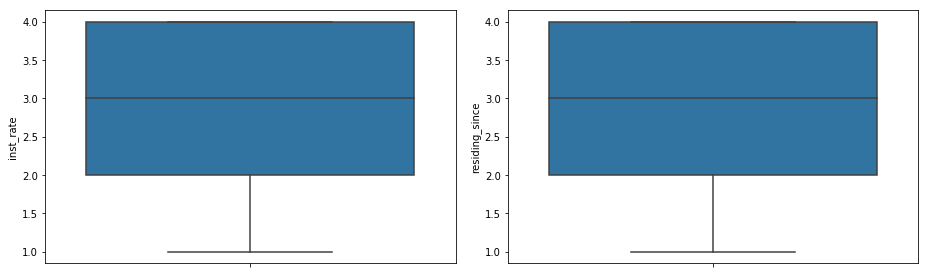

In [31]:
box_plot(X_train, ['inst_rate', 'residing_since'])

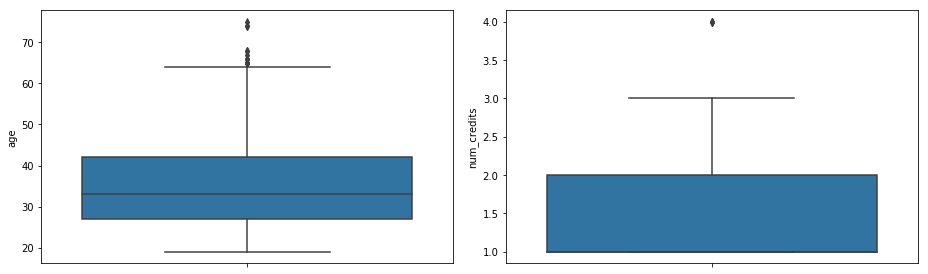

In [32]:
box_plot(X_train, ['age', 'num_credits'])

#### Age outyling values

In [46]:
iqr = X_train['age'].quantile(0.75) - X_train['age'].quantile(0.25)
whisker = X_train['age'].quantile(0.75) + 1.5 * iqr
outlying_values_frequency = X_train[X_train['age'] > whisker]['age'].value_counts()
outlying_values_frequency

65    4
74    2
68    2
66    2
75    1
67    1
Name: age, dtype: int64

#### Num_credits outlying values

In [47]:
iqr = X_train['num_credits'].quantile(0.75) - X_train['num_credits'].quantile(0.25)
whisker = X_train['num_credits'].quantile(0.75) + 1.5 * iqr
outlying_values_frequency = X_train[X_train['num_credits'] > whisker]['num_credits'].value_counts()
outlying_values_frequency

4    3
Name: num_credits, dtype: int64

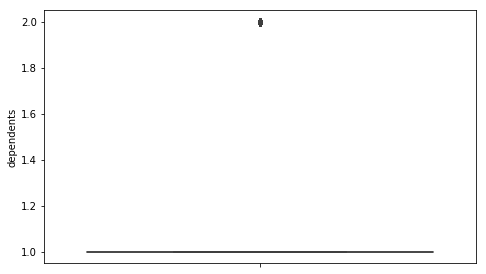

In [30]:
box_plot(X_train, ['dependents'])

#### Dependents outlying values

In [48]:
iqr = X_train['dependents'].quantile(0.75) - X_train['dependents'].quantile(0.25)
whisker = X_train['dependents'].quantile(0.75) + 1.5 * iqr
outlying_values_frequency = X_train[X_train['dependents'] > whisker]['dependents'].value_counts()
outlying_values_frequency

2    64
Name: dependents, dtype: int64

## 3) Statistical Information

### For numerical columns

In [86]:
X_train.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,21.452000,3449.456000,3.002000,2.840000,35.478000,1.416000,1.128000
std,12.056634,3073.550205,1.108356,1.084783,11.299951,0.586201,0.334424
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1364.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2335.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4274.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


- The standard deviation for installment_rate, residing_since, num_credits and dependents are very low. So we will have to take a call on, how these features can be included and how they can improve our model.
- The percentile values for different features like duration, amount, age vary very differently, which is an indication that we need to perform scaling on these features.

### For categorical columns

In [90]:
X_train.describe(include='object')

,checkin_acc,credit_history,purpose,saving_acc,present_emp_since,personal_status,other_debtors,property,inst_plans,housing,job,telephone,foreign_worker
count,500,500,500,500,500,500,500,500,500,500,500,500,500
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,197,259,149,302,173,271,451,175,413,352,311,288,482


- From the above statistics we can make out, for most features on an average there are 4 unique classes.

## 4) Distributions

In [180]:
def distribution_plot_numerical(X, num_cols):

    plt.figure(figsize=(20,15))
    for i in range(0, len(num_cols)):

        plt.subplot(4,2,i+1)
        sns.distplot(X[num_cols[i]], norm_hist=True)

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


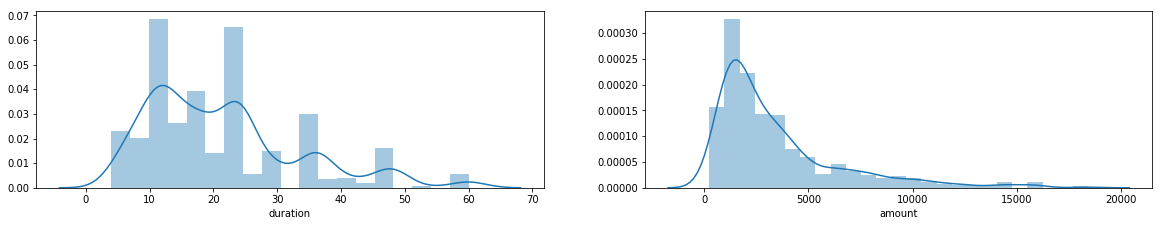

In [181]:
distribution_plot_numerical(X_train, ['duration', 'amount'])

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


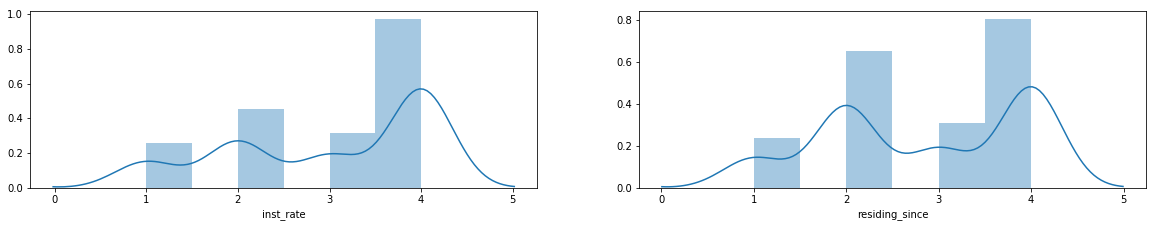

In [16]:
distribution_plot_numerical(X_train, ['inst_rate', 'residing_since'])

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


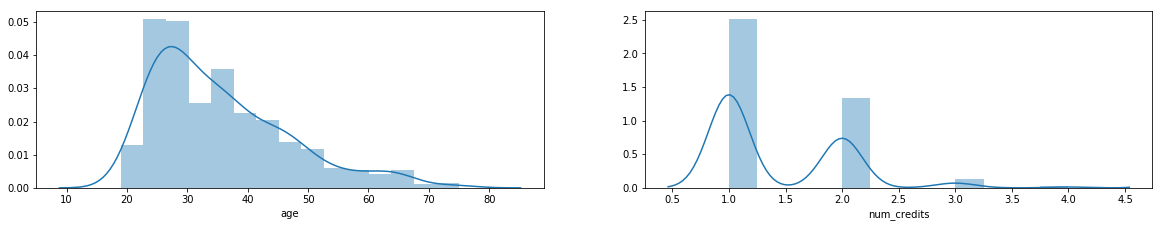

In [17]:
distribution_plot_numerical(X_train, ['age', 'num_credits'])

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


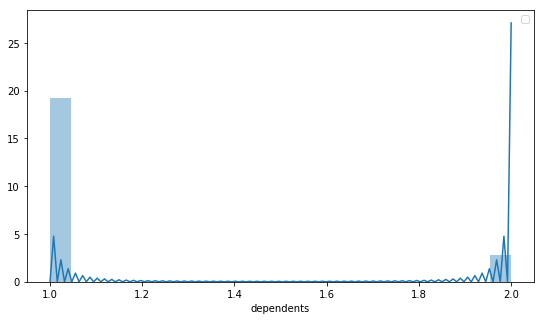

In [26]:
distribution_plot_numerical(X_train, ['dependents'])

In [92]:
def distribution_plot_categorical(X, cat_cols):
    plt.figure(figsize=(20,15))
    for i in range(0, len(cat_cols)):

        plt.subplot(7,2,i+1)
        sns.countplot(df[cat_cols[i]])
        plt.tight_layout()

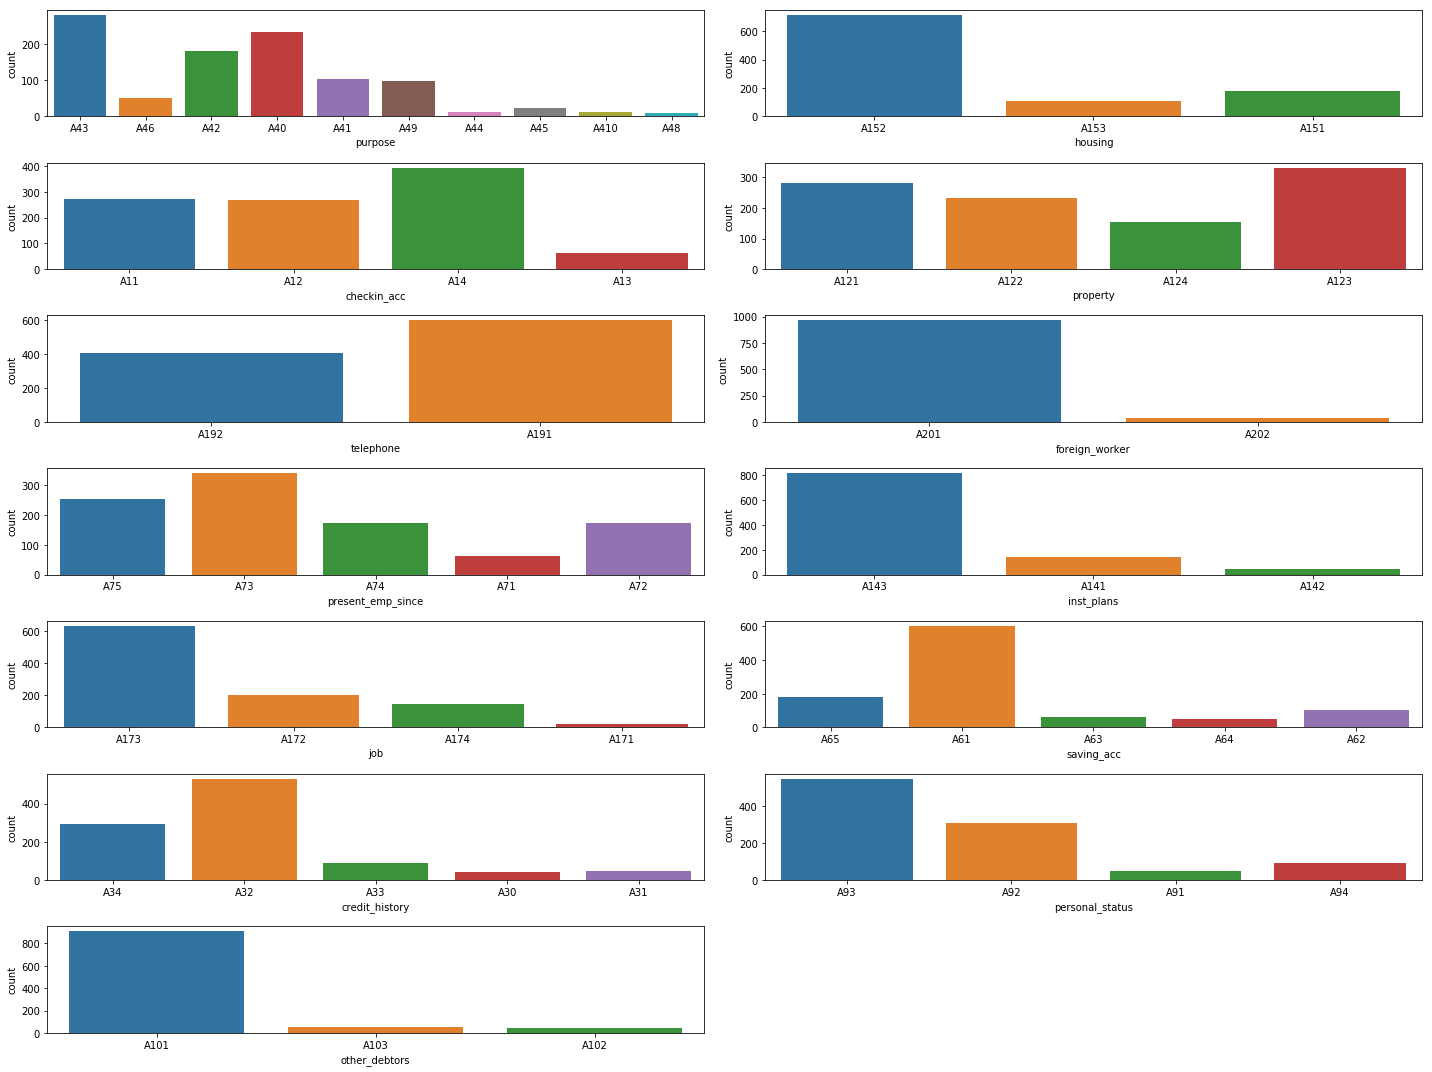

In [93]:
distribution_plot_categorical(X_train, cat_cols)

# EDA - Bivariate

## 1) Facet plots

## Correlating numerical features

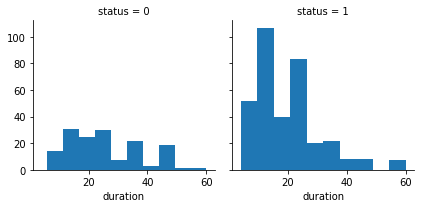

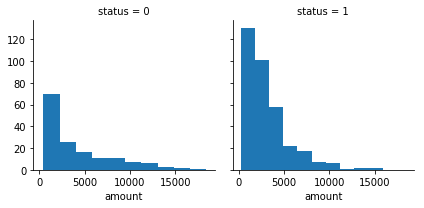

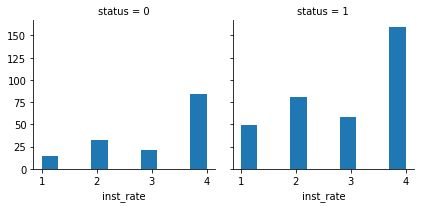

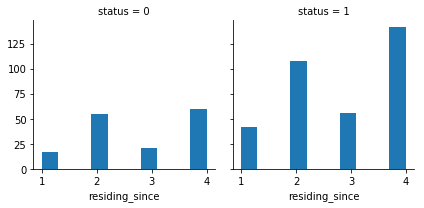

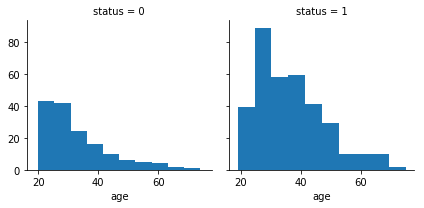

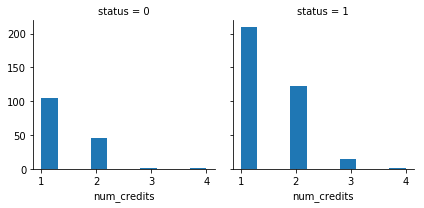

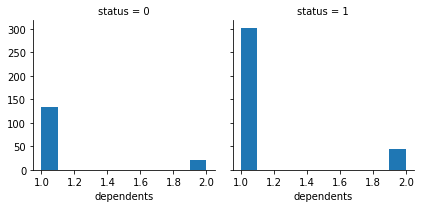

In [34]:
temp_df = pd.concat([X_train, y_train], axis=1)

for col in num_cols:
    
    g = sns.FacetGrid(temp_df,  col="status")
    g.map(plt.hist, col)

## 2) Feature-wise model accuracy

In [49]:
def dummify(train, test, cat_cols):
    train_dummy = pd.get_dummies(train, drop_first=True, prefix=cat_cols)
    test_dummy = pd.get_dummies(test, drop_first=True, prefix=cat_cols)
    # Add missing columns
    missing_cols = set(train_dummy.columns).difference(test_dummy.columns)
    for col in missing_cols:
        test_dummy[col] = 0
    return train_dummy, test_dummy

In [107]:
def model(X_train, y_train, X_val, y_val, cols, cols_attr):
    
    scores = []
    lr = LogisticRegression()
    scaler = StandardScaler()
    for col in cols:
        if cols_attr == "categorical":
            X_train_new, X_val_new = dummify(X_train[col], X_val[col], col)
            lr.fit(X_train_new, y_train)
            y_predict = lr.predict(X_val_new)
            scores.append((col , accuracy_score(y_val, y_predict)))
        if cols_attr == "numerical":
            X_train[col] = scaler.fit_transform(X_train[[col]])
            X_val[col] = scaler.transform(X_val[[col]])
            lr.fit(X_train[[col]], y_train)
            y_predict = lr.predict(X_val[[col]])
            scores.append((col , accuracy_score(y_val, y_predict)))
        
    return scores

In [103]:
def get_scores_df(scores_list):
    
    scores_df = pd.DataFrame()
    l = sorted(scores_list, key = lambda x: x[1], reverse=True)
    features = []
    scores = []
    for i in range(len(l)):
        features.append(l[i][0])
        scores.append(l[i][1])

    scores_df['features'] = features
    scores_df['scores'] = scores
    
    return scores_df

### Scores for categorical feature

In [108]:
scores_cat = model(X_train, y_train, X_val, y_val, cat_cols, 'categorical')
get_scores_df(scores_cat)

,features,scores
0,purpose,0.702
1,credit_history,0.698
2,saving_acc,0.694
3,checkin_acc,0.694
4,foreign_worker,0.694
5,personal_status,0.694
6,property,0.694
7,other_debtors,0.694
8,telephone,0.694
9,inst_plans,0.694


### Scores for numerical feature

In [109]:
scores_num = model(X_train, y_train, X_val, y_val, num_cols, 'numerical')
get_scores_df(scores_num)

,features,scores
0,amount,0.708
1,duration,0.704
2,inst_rate,0.694
3,residing_since,0.694
4,age,0.694
5,num_credits,0.694
6,dependents,0.694


## Multivariate - Heatmap

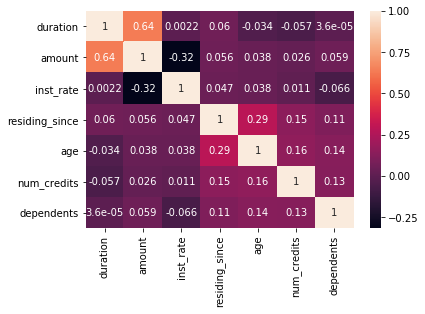

In [110]:
sns.heatmap(X_train[num_cols].corr(), annot=True)

## First Iteration

In [154]:
def logistic_model(X, y):
    
    lr = LogisticRegression()
    lr.fit(X, y)
    return lr

In [155]:
train_dummy, val_dummy = dummify(X_train, X_val, cat_cols)

In [156]:
train_dummy.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,saving_acc_A12,saving_acc_A13,saving_acc_A14,...,other_debtors_A124,telephone_A142,telephone_A143,inst_plans_A152,inst_plans_A153,housing_A172,housing_A173,housing_A174,job_A192,present_emp_since_A202
680,6,1538,1,2,56,1,1,0,0,1,...,1,0,1,1,0,0,1,0,0,0
177,6,338,4,4,52,2,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
395,39,11760,2,3,32,1,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
911,24,4736,2,4,25,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
793,24,2892,3,4,51,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0


In [157]:
train_dummy.shape, val_dummy.shape

((500, 48), (500, 48))

In [158]:
lr = logistic_model(train_dummy, y_train)

In [159]:
y_predict = lr.predict(val_dummy)
accuracy_score(y_val, y_predict)

0.788

## Feature Engineering

## Normalisation

In [151]:
def plot_transformed_features(X, cols):

    plt.figure(figsize=(15, 12))
    
    position = 0
    for i in range(len(cols)):
        position = position + 1
        plt.subplot(3,4,position)
        sns.distplot(X[cols[i]], kde=True)
        plt.title('Distribution before Log Transformation')
        position = position + 1
        plt.subplot(3,4,position)
        sns.distplot(np.log(X[cols[i]]), kde=True)
        plt.title('Distribution after log')
        position = position + 1
        plt.subplot(3,4,position)
        sns.boxplot(y = X[cols[i]])
        plt.title('Box-plot before log')
        position = position + 1
        plt.subplot(3,4,position)
        sns.boxplot(y = np.log(X[cols[i]]))
        plt.title('Box-plot after log')
        plt.tight_layout()

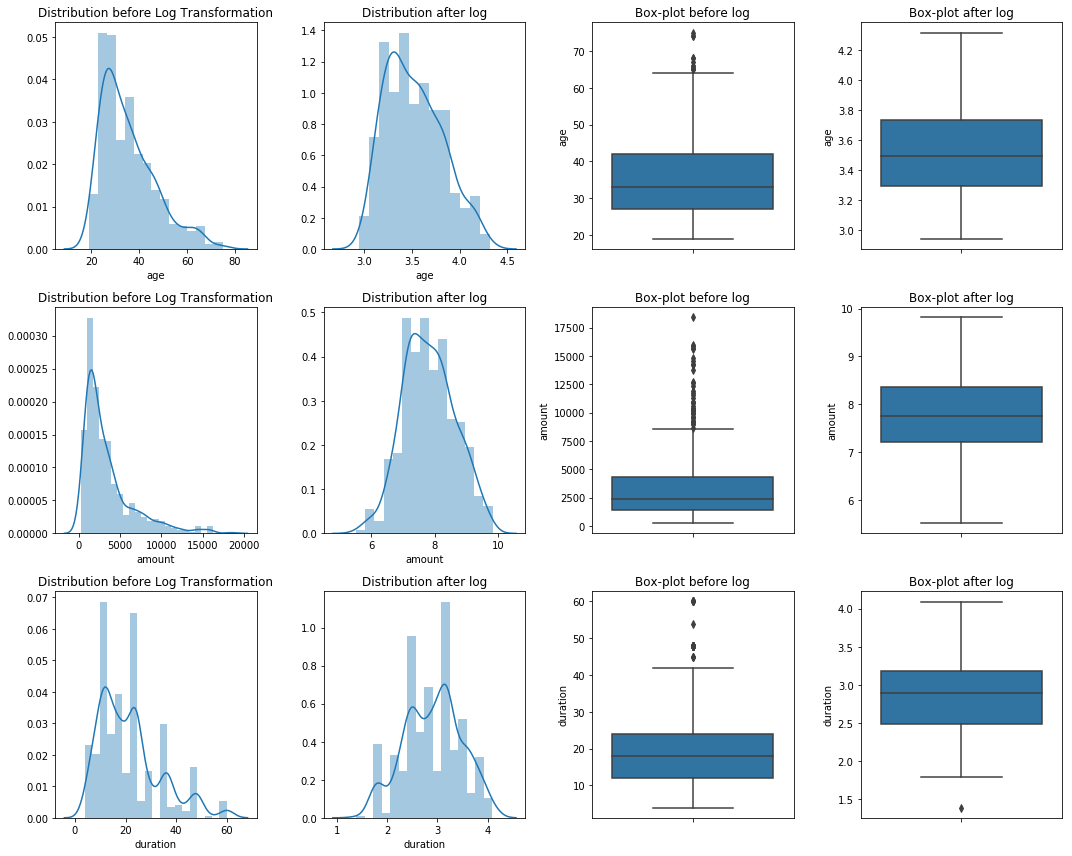

In [152]:
plot_transformed_features(X_train, ['age', 'amount', 'duration'])

- The above log transformation is the demonstration of reducing skewness from a feature, which indirectly handles outliers as shown below.

### Scaling & Normalize

In [169]:
def normalize_scale(X, cols):
    
    scaler = StandardScaler()
    for col in cols:
        
        X[col] = scaler.fit_transform(np.log(X[[col]]))
        
    return X

In [170]:
transformed_X_train = normalize_scale(X_train, ['duration', 'age', 'amount'])
transformed_X_val = normalize_scale(X_val, ['duration', 'age', 'amount'])

In [171]:
transformed_X_train.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker
680,A14,-1.971182,A32,A46,-0.591977,A61,A72,1,A92,A101,2,A124,1.692717,A143,A152,1,A173,1,A191,A201
177,A11,-1.971182,A34,A43,-2.463466,A63,A75,4,A93,A101,4,A123,1.442936,A143,A152,2,A173,1,A191,A201
395,A12,1.326295,A33,A46,1.920590,A62,A74,2,A93,A101,3,A124,-0.193470,A143,A151,1,A173,1,A192,A201
911,A12,0.470996,A34,A42,0.797208,A61,A72,2,A92,A101,4,A123,-1.025512,A141,A152,1,A172,1,A191,A201
793,A13,0.470996,A32,A42,0.187977,A61,A75,3,A91,A101,4,A124,1.377487,A143,A153,1,A173,1,A191,A201


In [172]:
transformed_X_val.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker
680,A14,-1.971182,A32,A46,-0.591977,A61,A72,1,A92,A101,2,A124,1.692717,A143,A152,1,A173,1,A191,A201
177,A11,-1.971182,A34,A43,-2.463466,A63,A75,4,A93,A101,4,A123,1.442936,A143,A152,2,A173,1,A191,A201
395,A12,1.326295,A33,A46,1.920590,A62,A74,2,A93,A101,3,A124,-0.193470,A143,A151,1,A173,1,A192,A201
911,A12,0.470996,A34,A42,0.797208,A61,A72,2,A92,A101,4,A123,-1.025512,A141,A152,1,A172,1,A191,A201
793,A13,0.470996,A32,A42,0.187977,A61,A75,3,A91,A101,4,A124,1.377487,A143,A153,1,A173,1,A191,A201


In [173]:
train_dummy, val_dummy = dummify(transformed_X_train, transformed_X_val, cat_cols)

In [174]:
val_dummy.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,saving_acc_A12,saving_acc_A13,saving_acc_A14,...,other_debtors_A124,telephone_A142,telephone_A143,inst_plans_A152,inst_plans_A153,housing_A172,housing_A173,housing_A174,job_A192,present_emp_since_A202
680,-1.971182,-0.591977,1,2,1.692717,1,1,0,0,1,...,1,0,1,1,0,0,1,0,0,0
177,-1.971182,-2.463466,4,4,1.442936,2,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
395,1.326295,1.920590,2,3,-0.193470,1,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
911,0.470996,0.797208,2,4,-1.025512,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
793,0.470996,0.187977,3,4,1.377487,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0


In [186]:
train_dummy.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,saving_acc_A12,saving_acc_A13,saving_acc_A14,...,other_debtors_A124,telephone_A142,telephone_A143,inst_plans_A152,inst_plans_A153,housing_A172,housing_A173,housing_A174,job_A192,present_emp_since_A202
680,-1.971182,-0.591977,1,2,1.692717,1,1,0,0,1,...,1,0,1,1,0,0,1,0,0,0
177,-1.971182,-2.463466,4,4,1.442936,2,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
395,1.326295,1.920590,2,3,-0.193470,1,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
911,0.470996,0.797208,2,4,-1.025512,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
793,0.470996,0.187977,3,4,1.377487,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0


## Second Iteration

### 1) Logistic Regression

In [176]:
lr = logistic_model(train_dummy, y_train)

In [177]:
y_predict = lr.predict(val_dummy)
accuracy_score(y_val, y_predict)

0.79

- After applying log transformation and Scaling the accuracy score has improved slightly

In [179]:
cm = confusion_matrix(y_val, y_predict)

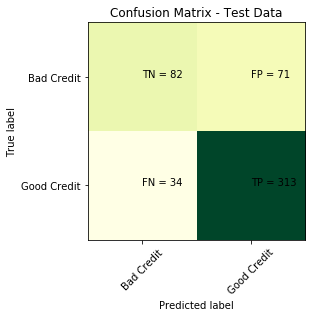

In [185]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.YlGn)
classNames = ['Bad Credit','Good Credit']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### 2) Decision Tree